In [13]:
#Objective of this project is to analyze any factors that explain prevalence of diabeteis by Counties.
# Robert Johson foundation County Health ranking for 2018 data is used. The data can be accessed in the below link.
#  https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation

    # Goals of the project: To show economic and social factors that explains prevalence of diabeties in counties across USA
    #                       :TO create Statistical models 
    #                    : To visualize States with more prevalence of Diabeties.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas import ExcelWriter
from pandas import ExcelFile
import json
from collections import Counter
import seaborn as sns
from pandas import DataFrame
import xlsxwriter
import nltk
import statsmodels as stats
import sklearn
import os

import folium
import schedule




font = {'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
rcParams['figure.figsize'] = 10, 8

%matplotlib inline

ModuleNotFoundError: No module named 'folium'

In [15]:
#import data
countydata=pd.read_excel("data/2018 County Health Rankings Data - v2.xls",sheet_name='Additional Measure Data', index_col=0,skiprows=1)

In [16]:
#import data
countyRankeddata=pd.read_excel("data/2018 County Health Rankings Data - v2.xls",sheet_name='Ranked Measure Data', index_col=0,skiprows=1)

In [17]:
countyRankeddata.columns

Index(['State', 'County', 'Years of Potential Life Lost Rate', '95% CI - Low',
       '95% CI - High', 'Quartile',
       'Years of Potential Life Lost Rate (Black)',
       'Years of Potential Life Lost Rate (Hispanic)',
       'Years of Potential Life Lost Rate (White)', '% Fair/Poor',
       ...
       '95% CI - High.20', 'Quartile.33', '% Drive Alone (Black)',
       '% Drive Alone (Hispanic)', '% Drive Alone (White)',
       '# Workers who Drive Alone', '% Long Commute - Drives Alone',
       '95% CI - Low.21', '95% CI - High.21', 'Quartile.34'],
      dtype='object', length=164)

In [18]:
countyRankedSelected=countyRankeddata[["% With Access","% Some College"]].reset_index()


In [19]:
countyRankedSelected.head()

,FIPS,% With Access,% Some College
0,1001.0,71.120192,61.942019
1,1003.0,68.518915,63.757100
2,1005.0,52.842627,39.723661
3,1007.0,48.592625,49.821371
4,1009.0,32.272077,53.866457


In [20]:
#show few records
countydata.head()

,State,County,# Deaths,Age-Adjusted Mortality,95% CI - Low,95% CI - High,Age-Adjusted Mortality (Black),Age-Adjusted Mortality (Hispanic),Age-Adjusted Mortality (White),# Deaths.1,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low.13,95% CI - High.13,% Female,# Rural,% Rural
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga,827.0,449.6,418.5,480.7,531.7,NaN,444.9,31.0,...,2.688754,41562,75.000000,432,0.832739,0.457689,1.207789,51.288437,22921.0,42.002162
1003,Alabama,Baldwin,2753.0,351.3,337.5,365.1,517.8,111.1,349.3,85.0,...,4.416411,173529,83.202198,1540,0.818809,0.508623,1.128996,51.457833,77060.0,42.279099
1005,Alabama,Barbour,418.0,433.6,390.5,476.6,477.0,NaN,394.7,15.0,...,4.213364,12061,46.450992,382,1.519370,0.790980,2.247760,46.932409,18613.0,67.789635
1007,Alabama,Bibb,408.0,529.1,476.7,581.4,630.4,NaN,526.6,22.0,...,2.499669,16850,74.415934,96,0.448137,0.000000,1.041411,46.363114,15663.0,68.352607
1009,Alabama,Blount,996.0,480.2,449.2,511.2,NaN,NaN,NaN,30.0,...,9.068695,50472,87.467073,1018,1.878506,1.332987,2.424025,50.613476,51562.0,89.951502


In [21]:
#reset index
countydata=countydata.reset_index()

In [22]:
#merge ranked data with additional data
countyMergedDf=countydata.merge(countyRankedSelected,on="FIPS",how ='left')

In [23]:
countyMergedDf.columns

Index(['FIPS', 'State', 'County', '# Deaths', 'Age-Adjusted Mortality',
       '95% CI - Low', '95% CI - High', 'Age-Adjusted Mortality (Black)',
       'Age-Adjusted Mortality (Hispanic)', 'Age-Adjusted Mortality (White)',
       ...
       '% Non-Hispanic White', '# Not Proficient in English',
       '% Not Proficient in English', '95% CI - Low.13', '95% CI - High.13',
       '% Female', '# Rural', '% Rural', '% With Access', '% Some College'],
      dtype='object', length=101)

In [24]:
#list variables to keep

Keepvariables= ['State','County','% 65 and over','% African American', '% Hispanic','% Non-Hispanic White','Household Income'
                ,'Other PCP Rate','% Uninsured','% Limited Access','% Diabetic',"% Rural","% With Access","% Some College"]

In [25]:
#keep varibales you want
countyMergedDf=countyMergedDf[Keepvariables]
countyMergedDf.head()

,State,County,% 65 and over,% African American,% Hispanic,% Non-Hispanic White,Household Income,Other PCP Rate,% Uninsured,% Limited Access,% Diabetic,% Rural,% With Access,% Some College
0,Alabama,Autauga,14.728598,19.048650,2.688754,75.000000,54487.0,28.87253,12.193092,11.991125,12.4,42.002162,71.120192,61.942019
1,Alabama,Baldwin,19.708194,9.042831,4.416411,83.202198,56460.0,43.63190,14.719861,5.424427,11.1,42.279099,68.518915,63.757100
2,Alabama,Barbour,18.016561,47.513961,4.213364,46.450992,32884.0,26.95937,17.401551,10.739667,18.2,67.789635,52.842627,39.723661
3,Alabama,Bibb,15.430817,21.618160,2.499669,74.415934,43079.0,75.07839,15.070569,2.601627,14.6,68.352607,48.592625,49.821371
4,Alabama,Blount,17.986621,1.434909,9.068695,87.467073,47213.0,12.13087,17.699115,2.880150,14.4,89.951502,32.272077,53.866457


In [26]:
countyMergedDf.iloc[:,2:].corr()

,% 65 and over,% African American,% Hispanic,% Non-Hispanic White,Household Income,Other PCP Rate,% Uninsured,% Limited Access,% Diabetic,% Rural,% With Access,% Some College
% 65 and over,1.000000,-0.195181,-0.231644,0.399348,-0.286168,-0.036556,-0.095281,0.078171,0.234061,0.477993,-0.166343,-0.063567
% African American,-0.195181,1.000000,-0.107333,-0.597716,-0.255272,-0.010251,0.240489,0.029127,0.450663,-0.116919,-0.152605,-0.226802
% Hispanic,-0.231644,-0.107333,1.000000,-0.604629,0.035405,-0.060717,0.443471,0.140853,-0.281726,-0.278651,0.099695,-0.166945
% Non-Hispanic White,0.399348,-0.597716,-0.604629,1.000000,0.117773,0.001977,-0.562748,-0.225029,-0.084723,0.305668,0.019641,0.256250
Household Income,-0.286168,-0.255272,0.035405,0.117773,1.000000,-0.032227,-0.397607,-0.217805,-0.569710,-0.389771,0.417066,0.606807
Other PCP Rate,-0.036556,-0.010251,-0.060717,0.001977,-0.032227,1.000000,-0.078355,0.015827,-0.087163,-0.177976,0.193305,0.179818
% Uninsured,-0.095281,0.240489,0.443471,-0.562748,-0.397607,-0.078355,1.000000,0.291947,0.218872,0.113838,-0.263261,-0.508086
% Limited Access,0.078171,0.029127,0.140853,-0.225029,-0.217805,0.015827,0.291947,1.000000,0.013816,0.146550,-0.234999,-0.075176
% Diabetic,0.234061,0.450663,-0.281726,-0.084723,-0.569710,-0.087163,0.218872,0.013816,1.000000,0.321907,-0.409245,-0.525486
% Rural,0.477993,-0.116919,-0.278651,0.305668,-0.389771,-0.177976,0.113838,0.146550,0.321907,1.000000,-0.575837,-0.321682


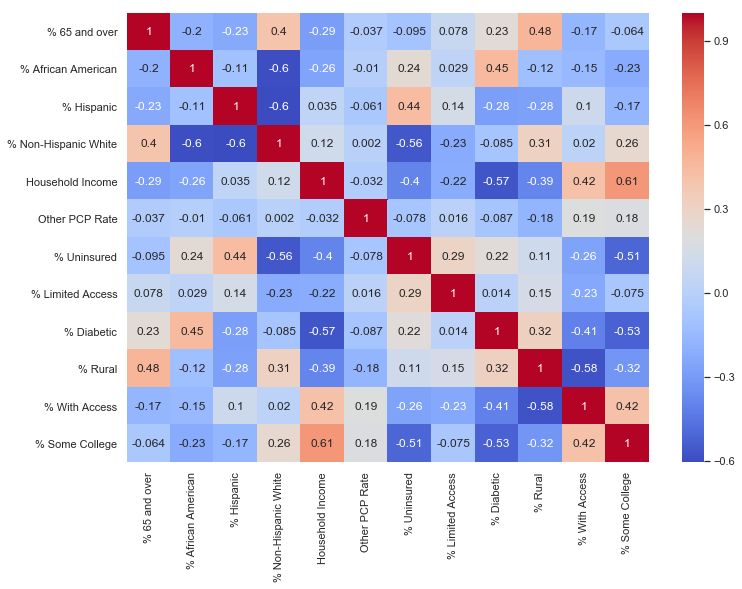

In [27]:
# plot correlation between variables
countydata_corr_df=countyMergedDf.iloc[:,2:]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(countydata_corr_df.corr(),cmap='coolwarm',annot=True);

### Downward slopes shows negative relationship between diabeties prevalence and the economic or social factors in considered.

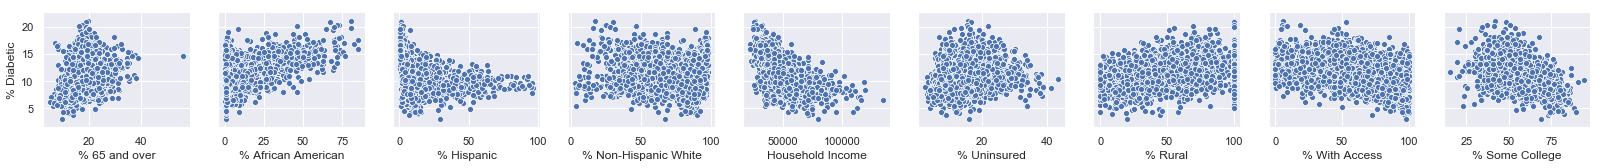

In [28]:
#keep only strong correlation variables and show plots
strongCorrvars= countydata_corr_df[['% 65 and over','% African American', '% Hispanic','% Non-Hispanic White','Household Income'
,'% Uninsured','% Diabetic',"% Rural","% With Access","% Some College"]]
sns.pairplot(strongCorrvars,x_vars=['% 65 and over','% African American', '% Hispanic','% Non-Hispanic White','Household Income'
,'% Uninsured',"% Rural","% With Access","% Some College"],y_vars='% Diabetic')
plt.show()

In [29]:
#import State location

#import data
Location=pd.read_excel("data/Location.xlsx")
Location.head()

,State,state_abbr,latitude,longitude
0,Alaska,AK,63.588753,-154.493062
1,Alabama,AL,32.318231,-86.902298
2,Arkansas,AR,35.201050,-91.831833
3,Arizona,AZ,34.048928,-111.093731
4,California,CA,36.778261,-119.417932


In [30]:
#calculate average prevalence by States
Average_State_Prevalence=countyMergedDf[["State","% Diabetic"]].groupby("State").mean().reset_index()

In [31]:
# merge with location data
Average_State_Prevalence=Average_State_Prevalence.merge(Location,on="State",how="left")

In [32]:
Average_State_Prevalence.columns

Index(['State', '% Diabetic', 'state_abbr', 'latitude', 'longitude'], dtype='object')

In [33]:
Average_State_Prevalence.head()

,State,% Diabetic,state_abbr,latitude,longitude
0,Alabama,15.364179,AL,32.318231,-86.902298
1,Alaska,7.596552,AK,63.588753,-154.493062
2,Arizona,11.100000,AZ,34.048928,-111.093731
3,Arkansas,13.853333,AR,35.201050,-91.831833
4,California,8.598276,CA,36.778261,-119.417932


### Alabama, Mississippi and South Carolina are the top States in Diobeties prevalence
### Colorado is the lowest

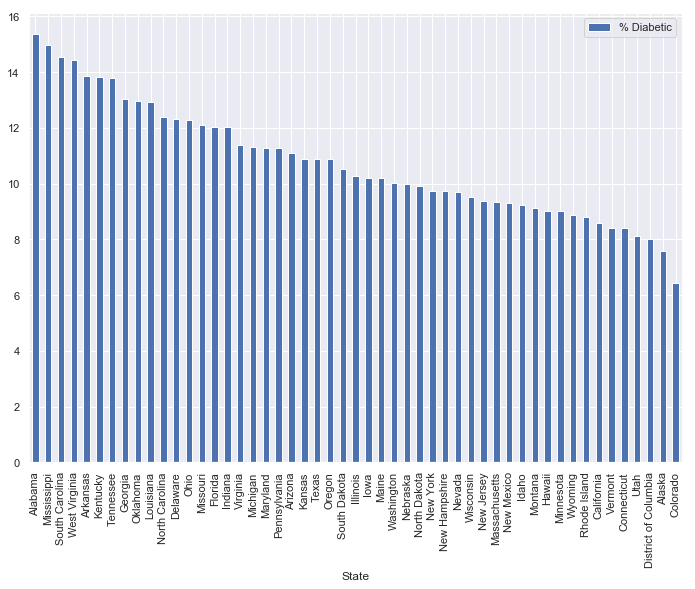

In [34]:
#Show by States the Average rate of Prevalence
Average_State_Prevalence[['State', '% Diabetic']].set_index('State').sort_values('% Diabetic',ascending=False).plot(kind='bar')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]),
 <a list of 51 Text xticklabel objects>)

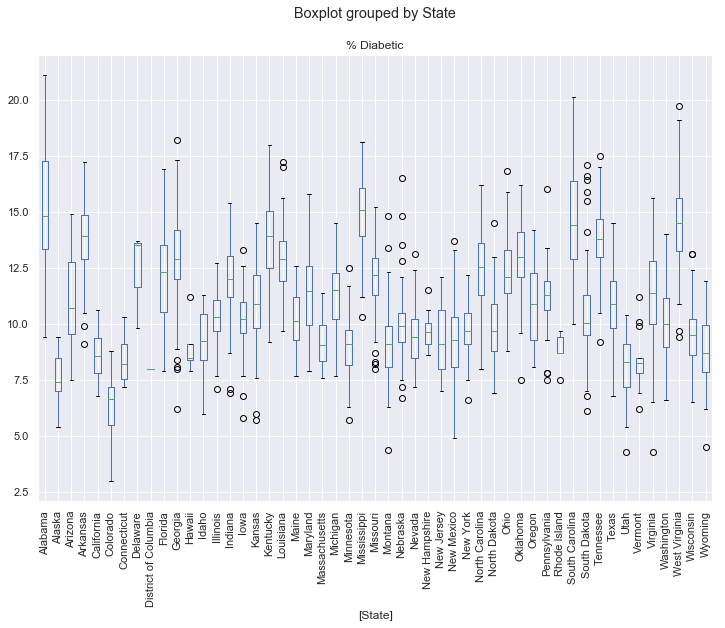

In [35]:
#show variations of prevalence rate by states
countyMergedDf[['State','% Diabetic']].sort_values('% Diabetic',ascending=False).boxplot(by="State")
plt.xticks(rotation='vertical')